In [18]:
import pandas as pd
import numpy as np


In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [34]:
df=pd.read_csv('heart.csv')

In [35]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bias      303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   303 non-null    int64  
 9   exang     303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    int64  
 12  ca        303 non-null    int64  
 13  thal      303 non-null    int64  
 14  target    303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [21]:
def hypothesis(X, theta):  ## hypothesis or predicted and X is the predictor theta 
    z = np.dot(theta, X.T)
    return 1/(1+np.exp(-(z))) - 0.000001     ### if the output will be 1 then expression will come as the log of zero,
    ### to contradict it i subtract very small number at the end

In [36]:
def cost(X, y, theta): ## cost funvtion , X is to be predicted(X is theinput feature) theta is random value
    y_hat = hypothesis(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

In [37]:
def gradient_descent(X, y, theta, alpha, epochs):
    m =len(X)
    J = [cost(X, y, theta)] 
    for i in range(0, epochs):
        h = hypothesis(X, theta)
        for i in range(0, len(X.columns)):
            theta[i] -= (alpha/m) * np.sum((h-y)*X.iloc[:, i])
        J.append(cost(X, y, theta))
    return J, theta

In [38]:
def predict(X, y, theta, alpha, epochs):
    J, th = gradient_descent(X, y, theta, alpha, epochs) 
    h = hypothesis(X, theta)
    for i in range(len(h)):
        h[i]=1 if h[i]>=0.5 else 0
    y = list(y)
    acc = np.sum([y[i] == h[i] for i in range(len(y))])/len(y)
    return J, acc

In [39]:
df = pd.concat([pd.Series(1, index = df.index, name = 'bias'), df], axis=1) ## Add one extra column for the bias. This should be a column of ones.

In [40]:
df.head()

,bias,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,1,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,1,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,1,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
X = df.drop(columns=[ "cp", "thal"])
y= df["target"]

In [42]:
X

,bias,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,1,63,1,145,233,1,0,150,0,2.3,0,0,1
1,1,37,1,130,250,0,1,187,0,3.5,0,0,1
2,1,41,0,130,204,0,0,172,0,1.4,2,0,1
3,1,56,1,120,236,0,1,178,0,0.8,2,0,1
4,1,57,0,120,354,0,1,163,1,0.6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,57,0,140,241,0,1,123,1,0.2,1,0,0
299,1,45,1,110,264,0,1,132,0,1.2,1,0,0
300,1,68,1,144,193,1,1,141,0,3.4,1,2,0
301,1,57,1,130,131,0,1,115,1,1.2,1,1,0


In [43]:
theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.0001, 25000) ### 0.0001 is learning rate and 25000 is epochs i.e., upto certain times 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


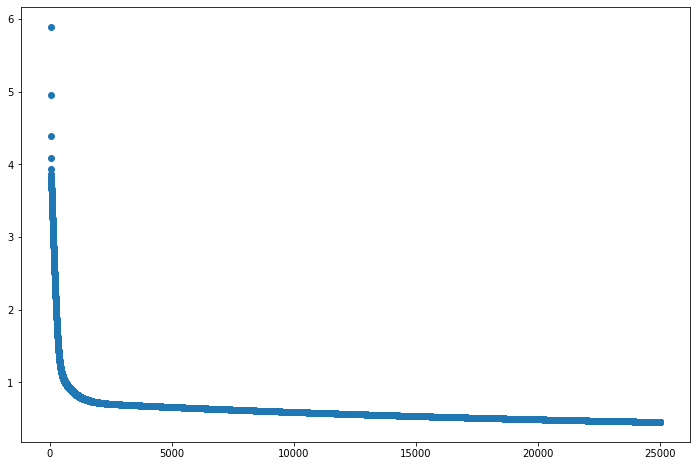

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.show()

In [45]:
df

,bias,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,1,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,1,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,1,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,1,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,1,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,1,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
